In [3]:
import pickle

with open(r"C:\Users\administrateur\newsgroups", 'rb') as f:
    newsgroup_data = pickle.load(f)

# Assume it's a list or series of raw text documents
texts = newsgroup_data if isinstance(newsgroup_data, list) else newsgroup_data['data']


In [4]:
import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub(r'http\S+', '', text)     # Remove URLs
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", " ", text)  # Remove punctuation
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(tokens)

cleaned_texts = [clean_text(doc) for doc in texts]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\administrateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# For LDA: CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
X_counts = count_vectorizer.fit_transform(cleaned_texts)

# For NMF: TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=10, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_texts)


In [6]:
from sklearn.decomposition import LatentDirichletAllocation, NMF

n_topics = 10

# LDA
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(X_counts)

# NMF
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(X_tfidf)


NMF(n_components=10, random_state=42)

In [7]:
def display_topics(model, feature_names, n_top_words, method):
    for idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"🔹 {method} Topic #{idx+1}: {' | '.join(top_words)}")

print("💬 LDA Topics:")
display_topics(lda_model, count_vectorizer.get_feature_names_out(), 10, "LDA")

print("\n💬 NMF Topics:")
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), 10, "NMF")

💬 LDA Topics:
🔹 LDA Topic #1: game | team | year | bike | good | win | play | season | run | time
🔹 LDA Topic #2: test | dr | pain | helmet | april | sequence | lunar | research | lock | bike
🔹 LDA Topic #3: drive | disk | controller | hard | card | power | ground | rom | pin | support
🔹 LDA Topic #4: people | god | think | say | argument | like | atheism | thing | book | know
🔹 LDA Topic #5: drive | scsi | problem | like | know | chip | work | thanks | mac | apple
🔹 LDA Topic #6: car | like | time | oil | speed | mile | engine | good | used | make
🔹 LDA Topic #7: year | car | time | doctor | way | problem | king | patient | lot | disease
🔹 LDA Topic #8: year | player | think | like | team | cancer | people | center | hockey | league
🔹 LDA Topic #9: monitor | card | make | work | know | msg | like | good | keyboard | vga
🔹 LDA Topic #10: space | data | information | mail | program | available | nasa | use | software | thanks

💬 NMF Topics:
🔹 NMF Topic #1: people | think | say | thing |

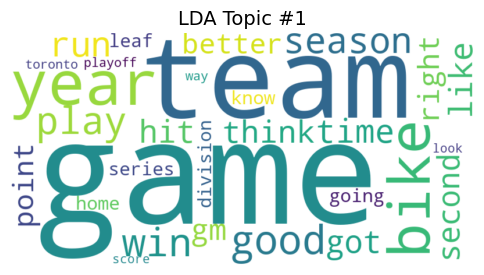

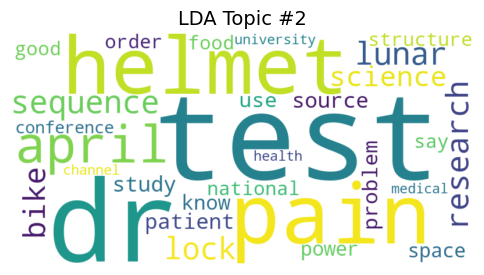

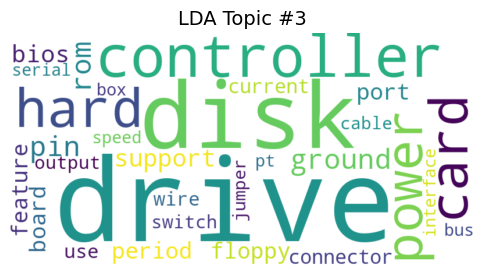

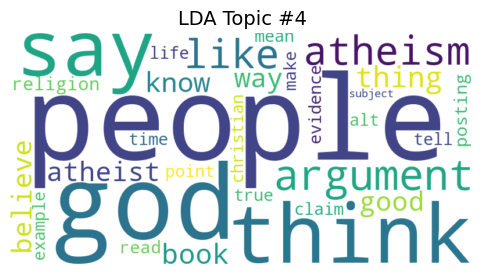

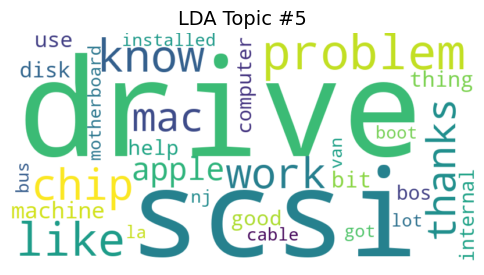

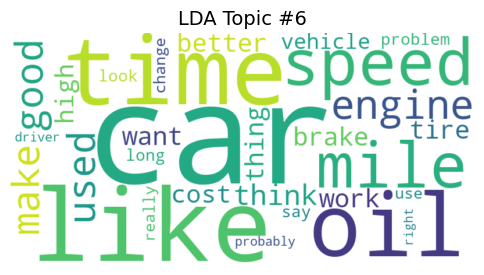

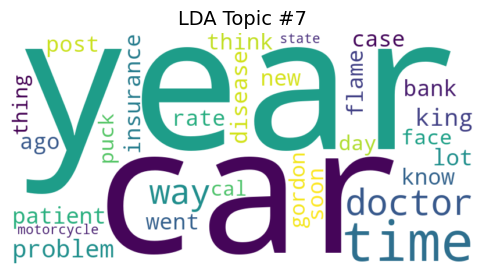

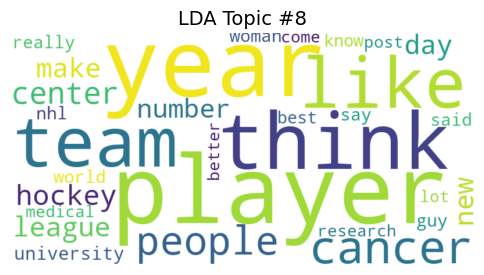

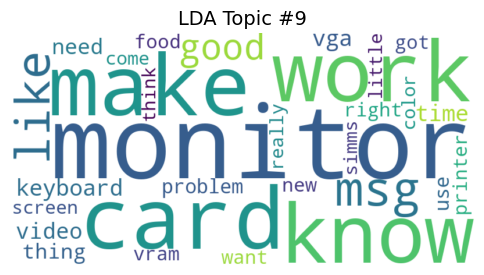

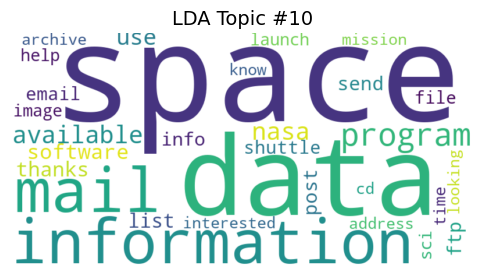

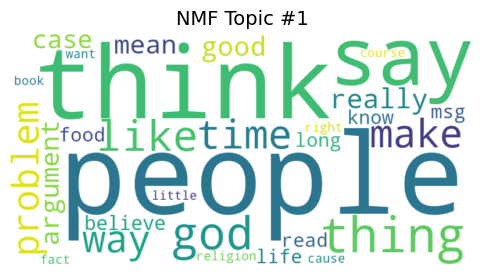

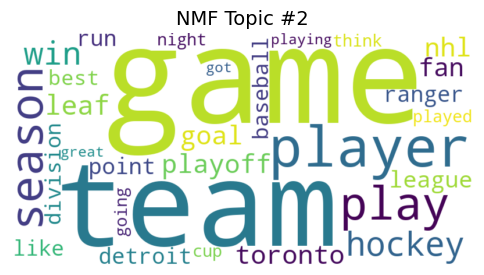

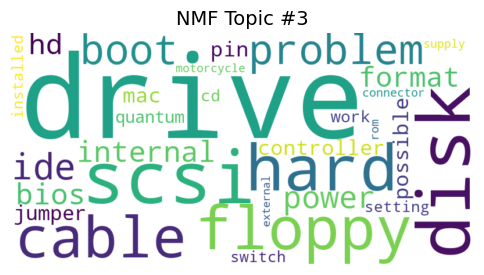

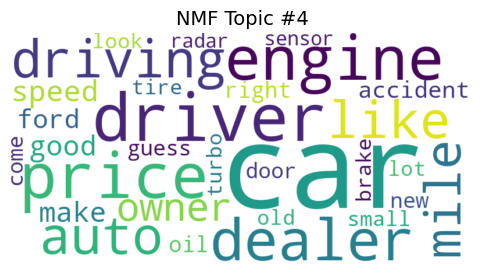

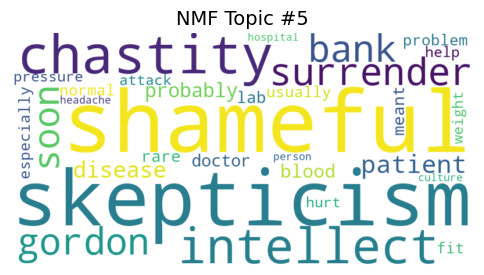

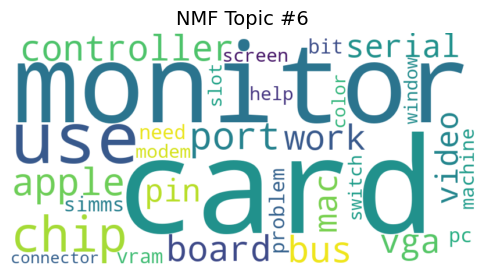

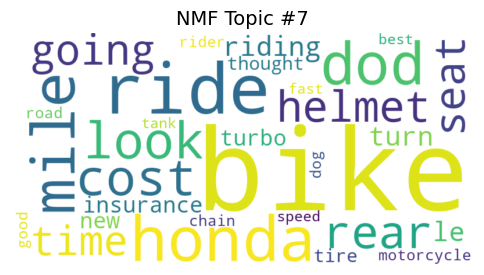

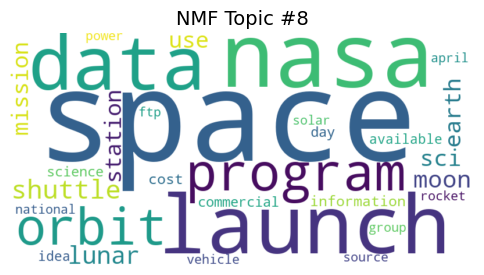

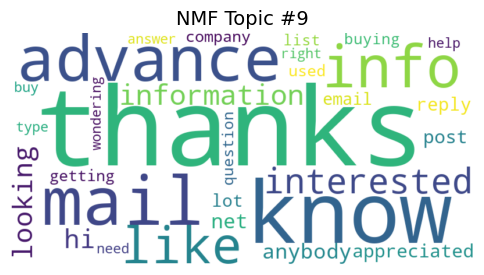

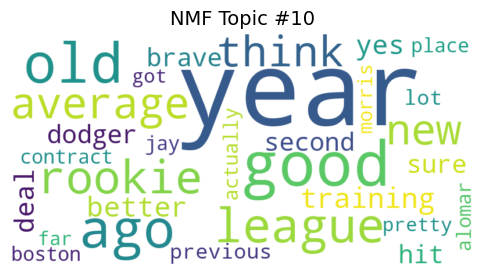

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(model, feature_names, method):
    for idx, topic in enumerate(model.components_):
        plt.figure(figsize=(6, 4))
        topic_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-31:-1]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{method} Topic #{idx+1}", fontsize=14)
        plt.show()

plot_wordcloud(lda_model, count_vectorizer.get_feature_names_out(), "LDA")
plot_wordcloud(nmf_model, tfidf_vectorizer.get_feature_names_out(), "NMF")